In [5]:
import pandas as pd
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

In [8]:
df=pd.read_csv(r"C:\Users\97798\Downloads\IMDb Movies India.csv.zip", encoding='ISO-8859-1')

In [9]:
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.shape

(15509, 10)

In [11]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [12]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [14]:
df.duplicated().sum()

np.int64(6)

In [15]:
df.dropna(inplace=True)

In [16]:
df.shape

(5659, 10)

In [17]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [18]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

Data Pre Processing

In [19]:
df['Year']= df['Year'].str.strip('()').astype(int)

In [20]:
df['Duration'] = df['Duration'].str.strip('min')

In [21]:
df['Votes'] = df['Votes'].astype(str).str.replace(',','').astype(int)

In [22]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [23]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [24]:
top_10_movies = df.sort_values(by='Rating', ascending=False).head(10)

In [25]:
top_10_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1729,Baikunth,2021,72,Family,9.3,29,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
11843,Refl3ct,2021,65,Sci-Fi,9.3,467,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar


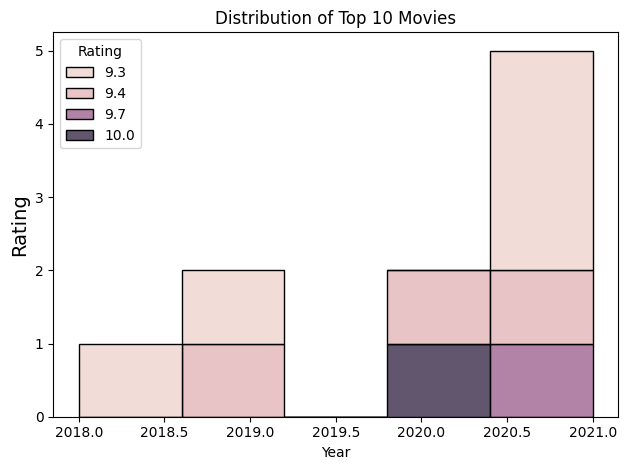

In [26]:
plt.title('Distribution of Top 10 Movies')
sns.histplot(data=top_10_movies, x='Year', hue='Rating',multiple='stack')
plt.xlabel('Year')
plt.ylabel('Rating',fontsize=14)
plt.tight_layout()

In [27]:
genre_counts=df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
top_10_genres = genre_counts.head(10)
top_10_genres

,Genre,Count
0,Drama,844
1,"Drama, Romance",332
2,"Action, Crime, Drama",329
3,"Action, Drama",206
4,"Comedy, Drama",205
5,"Comedy, Drama, Romance",188
6,Comedy,187
7,Action,170
8,"Drama, Family",160
9,Romance,126


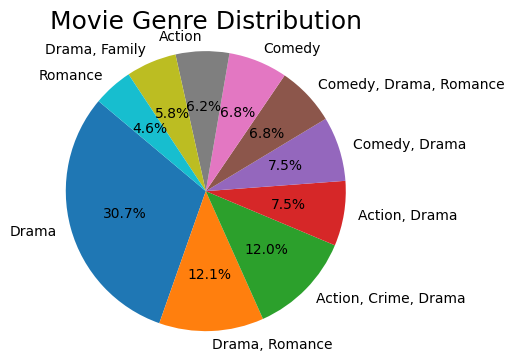

In [28]:
plt.figure(figsize=(5,4))
plt.pie(top_10_genres['Count'], labels=top_10_genres['Genre'],autopct='%1.1f%%',startangle=140)
plt.title('Movie Genre Distribution',fontsize=18)
plt.axis('equal')
plt.show()


In [29]:
director_avg_rating = df.groupby('Director')['Rating'].mean().reset_index()
director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)
top_directors= director_avg_rating.head(10)
top_directors

,Director,Rating
1833,Saif Ali Sayeed,10.0
2107,Sriram Raja,9.7
1240,Munni Pankaj,9.4
2142,Suhrud Godbole,9.4
274,Arvind Pratap,9.4
1306,Nikhil Mahar,9.3
2387,Vishwa Bhanu,9.3
1921,Sapna Bhavnani,9.3
1515,Raghav Jairath,9.3
635,Gautam Joshi,9.3


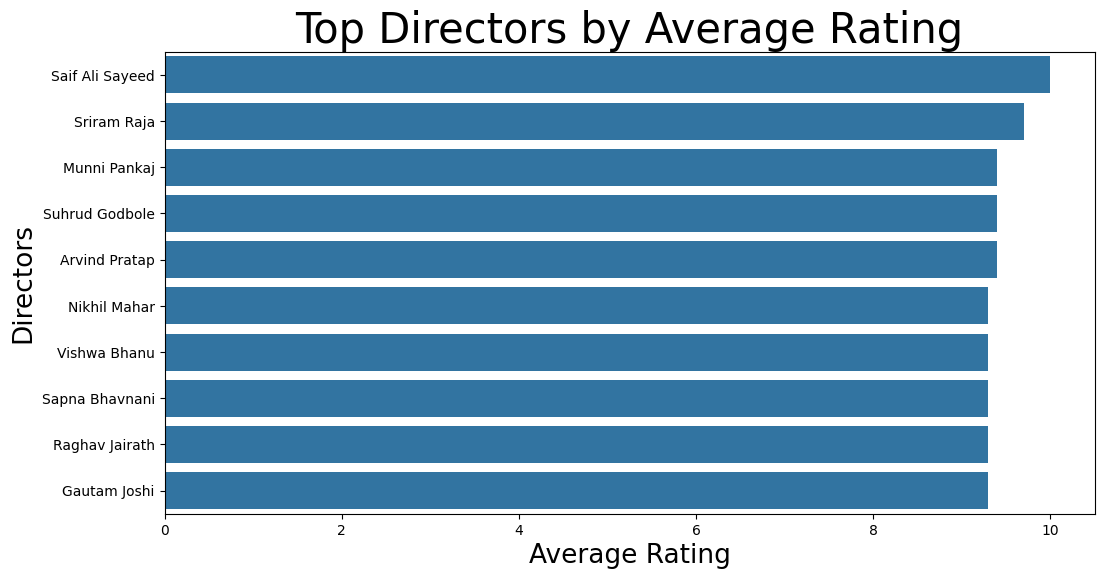

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_directors, x='Rating', y='Director')
plt.title('Top Directors by Average Rating', fontsize=30)
plt.xlabel('Average Rating', fontsize=19)
plt.ylabel('Directors',fontsize=19)
plt.show()

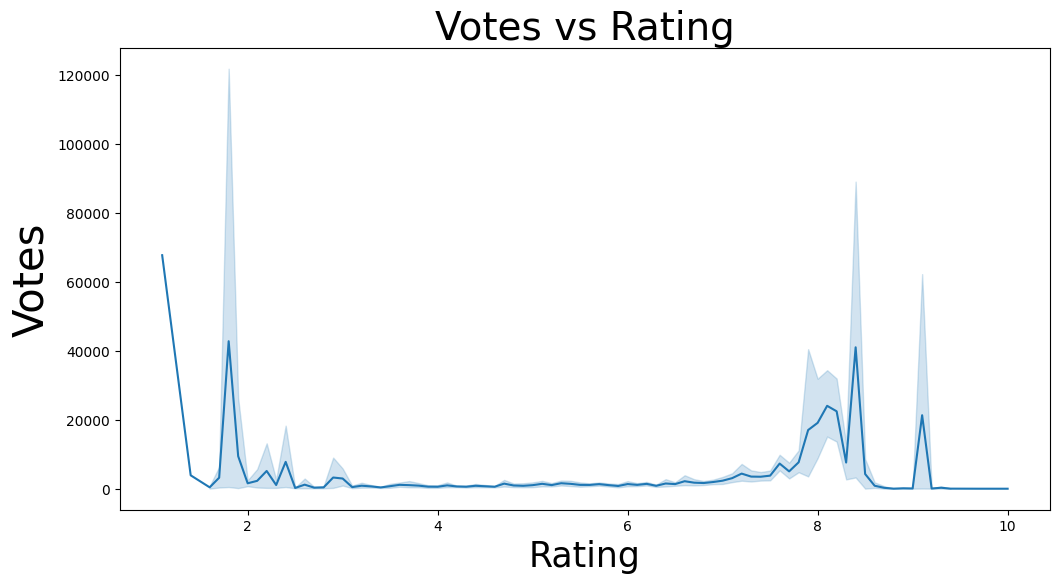

In [31]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Rating',y='Votes')
plt.title('Votes vs Rating', fontsize=28)
plt.xlabel('Rating', fontsize=25)
plt.ylabel('Votes', fontsize=30)
plt.show()

In [32]:
actor_counts = df['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor','MovieCount']
top_actors = actor_counts.head(10)
top_actors

,Actor,MovieCount
0,Amitabh Bachchan,104
1,Mithun Chakraborty,93
2,Ashok Kumar,91
3,Dharmendra,90
4,Jeetendra,89
5,Akshay Kumar,82
6,Shashi Kapoor,81
7,Rajesh Khanna,74
8,Ajay Devgn,70
9,Sanjay Dutt,61


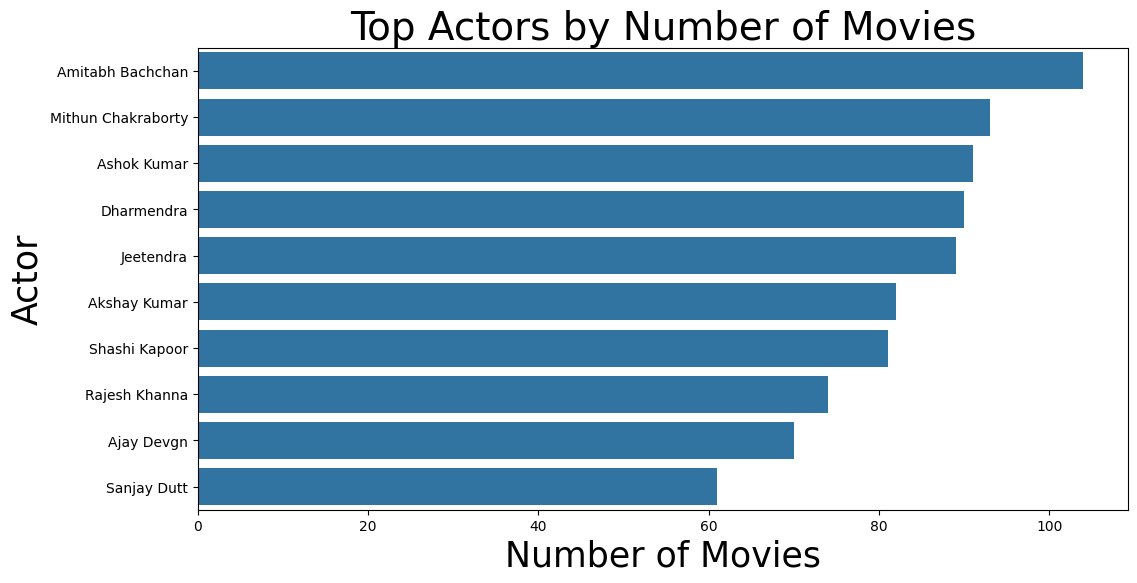

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_actors, x='MovieCount', y='Actor')  
plt.title('Top Actors by Number of Movies', fontsize=28)
plt.xlabel('Number of Movies', fontsize=25)
plt.ylabel('Actor', fontsize=25)  
plt.show()


In [34]:
yearly_movie_counts = df['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year','MovieCount']
yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

,Year,MovieCount
86,1931,2
90,1932,1
89,1933,1
87,1934,2
83,1935,5
...,...,...
1,2017,211
2,2018,202
0,2019,227
9,2020,140


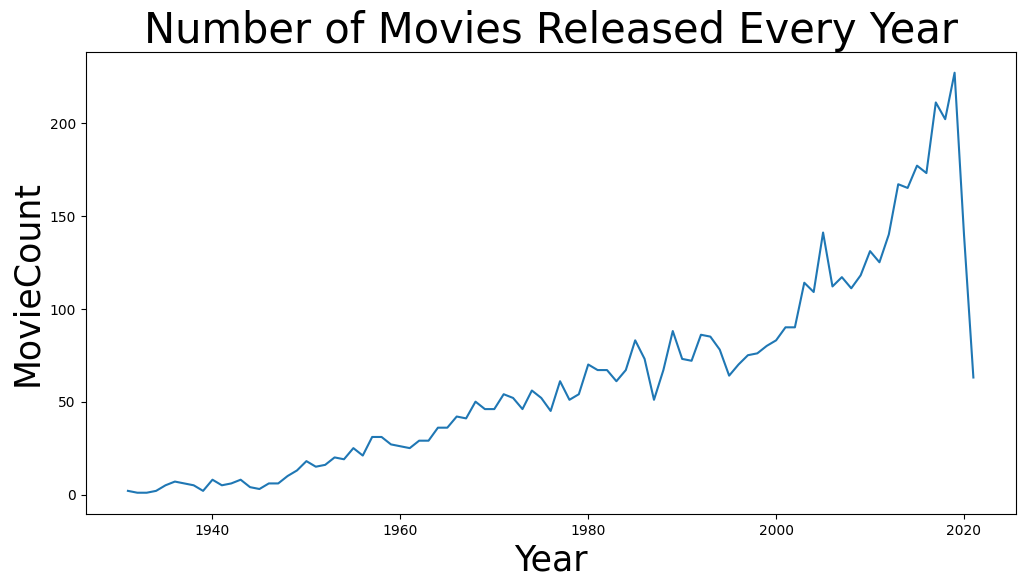

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')
plt.title('Number of Movies Released Every Year', fontsize=30)
plt.xlabel('Year', fontsize=25)
plt.ylabel('MovieCount', fontsize=25)
plt.show()

In [36]:
df['Genre']= df['Genre'].str.split(',')
genre_df = df.explode('Genre')
genre_df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15503,Zulm Ki Zanjeer,1989,125,Drama,5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15505,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


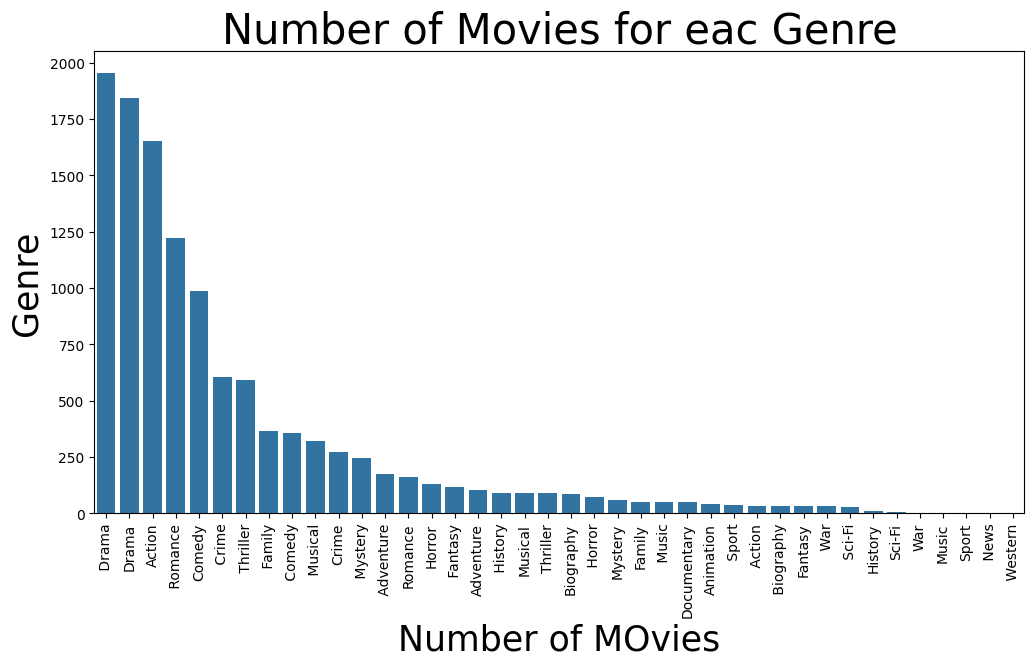

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index )
plt.title('Number of Movies for eac Genre', fontsize=30)
plt.xlabel('Number of MOvies', fontsize=25)
plt.ylabel('Genre', fontsize=25)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Duration of movies by Year')

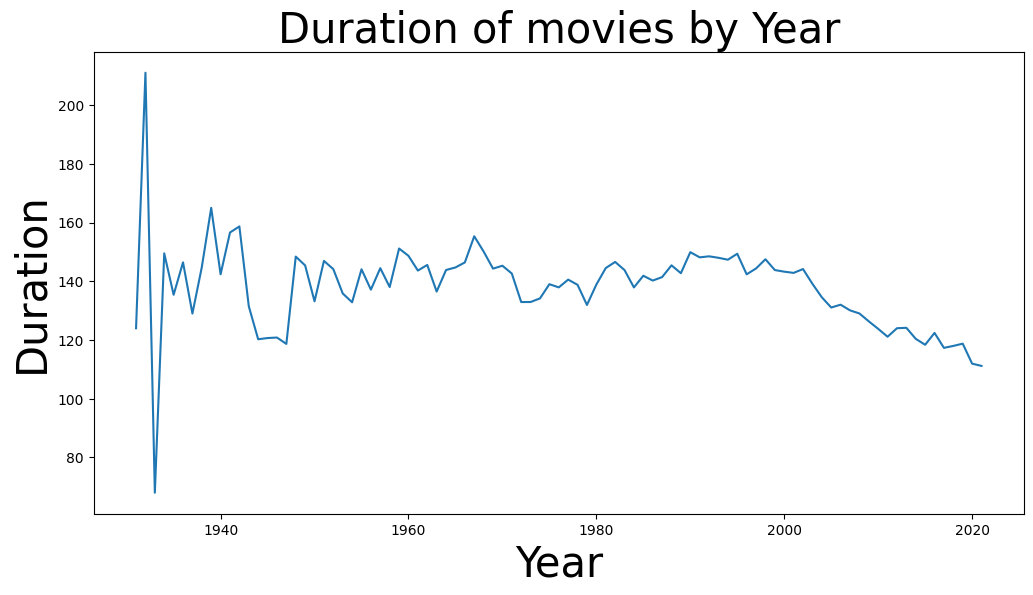

In [38]:
df['Duration'] = df['Duration'].astype(int)
df['Year'] = df['Year'].astype(int)
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='Duration',errorbar=None)
plt.xlabel('Year', fontsize=30)
plt.ylabel('Duration', fontsize=30)
plt.title('Duration of movies by Year',fontsize=30)

In [39]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)


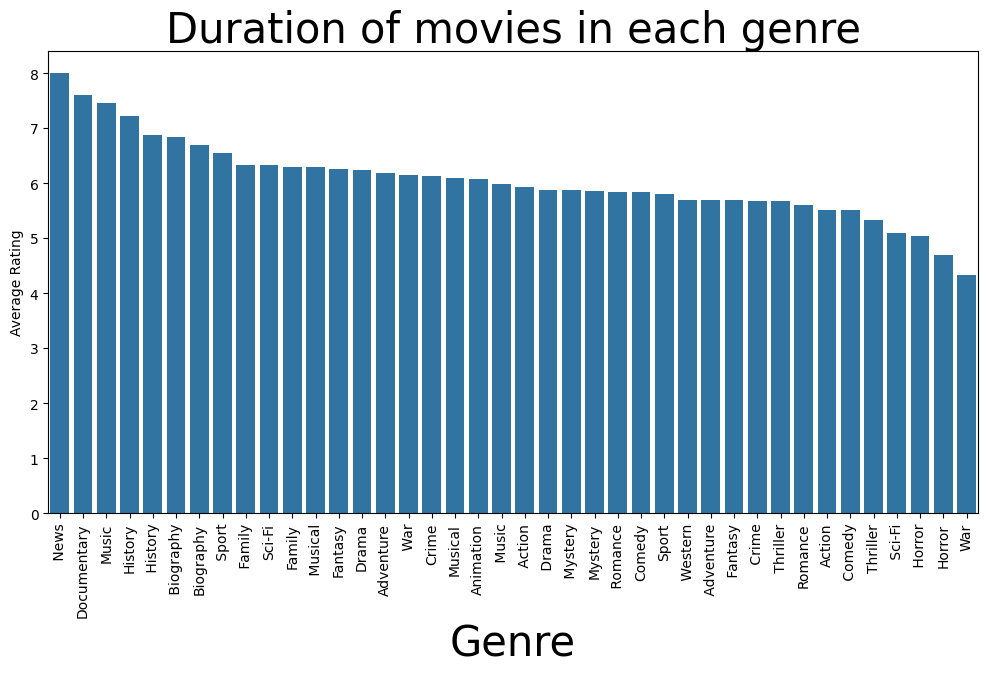

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(data=average_rating_by_genre, x='Genre', y='Rating')
plt.xlabel('Genre', fontsize=30)
plt.ylabel('Average Rating')
plt.title('Duration of movies in each genre',fontsize=30)
plt.xticks(rotation=90)
plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
trans_data = df.drop(['Name'],axis=1)
trans_data['Director'] = labelencoder.fit_transform(df['Director'])
trans_data['Actor 1'] = labelencoder.fit_transform(df['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(df['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(df['Actor 3'])
trans_data['Genre'] = labelencoder.fit_transform(df['Genre'].apply(lambda x: ','.join(x)))
trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,229,7.0,8,629,1352,2272,319
3,2019,110,184,4.4,35,1335,1198,719,2148
5,1997,147,157,4.7,827,1530,378,75,2045
6,2005,142,289,7.4,1086,2044,692,1112,2524
8,2012,82,320,5.6,326,135,1934,1175,1013


In [42]:
#Importing essential libraries for model building
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)
sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.977778,0.293333,0.610667,0.662921,0.000005,0.258848,0.690148,0.979310,0.124853
1,0.977778,0.296667,0.490667,0.370787,0.000051,0.549383,0.611536,0.309914,0.840705
2,0.733333,0.420000,0.418667,0.404494,0.001390,0.629630,0.192956,0.032328,0.800391
3,0.822222,0.403333,0.770667,0.707865,0.001828,0.841152,0.353241,0.479310,0.987867
4,0.900000,0.203333,0.853333,0.505618,0.000543,0.055556,0.987238,0.506466,0.396477


In [43]:
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Votes       0.142563
Genre       0.121796
Actor 3     0.042413
Actor 2     0.041353
Actor 1     0.023430
Duration    0.001839
Director   -0.006824
Year       -0.204642
Name: Rating, dtype: float64

<Axes: >

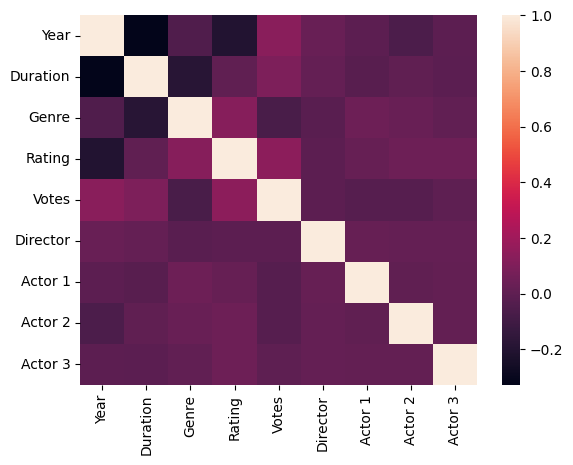

In [44]:
sns.heatmap(corr_df,annot=False)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [46]:
x = trans_data.drop(['Rating'],axis=1)

In [47]:
y= trans_data['Rating']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=38)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [49]:
x_test = np.array(x_test)

In [50]:
y_pred = model.predict(x_test)
y_pred

E:\python11 am\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.17045291, 5.55123302, 6.10113873, ..., 6.03531587, 5.69613653,
       5.83318259], shape=(1698,))

In [51]:
print('R2 score:',r2_score(y_test,y_pred))
print('mean_squared_error:',mean_squared_error(y_test,y_pred))
print('mean_absolute_error:',mean_absolute_error(y_test,y_pred))

R2 score: 0.09505960777090317
mean_squared_error: 1.7431320820254057
mean_absolute_error: 1.0616006568326823


In [52]:
print(y_test)

3531     7.5
13921    4.3
3897     5.0
821      3.7
11000    6.2
        ... 
653      6.2
6027     5.4
14309    4.4
12977    4.0
9131     7.2
Name: Rating, Length: 1698, dtype: float64
